# Курсовая работа

## Задача "Выход из он-лайн игры"

В этой задаче необходимо научиться предсказывать, остается ли участник в он-лайн игре или уходит из нее(__Exit__ 0 или  1). Уходом считается отсутствие его в игре в течение недели.

## Характеристики датасета

#### Всего используется 12 признаков:
__maxPlayerLevel__ - максимальный уровень игры, который прошел игрок
<br>__numberOfAttemptedLevels__ - количество уровней, которые попытался пройти игрок
<br>__attemptsOnTheHighestLevel__ - число попыток, сделанных на самом высоком уровне
<br>__totalNumOfAttempts__ - общее число попыток
<br>__averageNumOfTurnsPerCompletedLevel__ - среднее количество ходов, выполненных на успешно пройденных уровнях
<br>__doReturnOnLowerLevels__ - делал ли игрок возвраты к игре на уже пройденных уровнях
<br>__numberOfBoostersUsed__ - количество использованных бустеров
<br>__fractionOfUsefullBoosters__ - количество бустеров, использованных во время успешных попыток (игрок прошел уровнь)
<br>__totalScore__ - общее количество набранных очков
<br>__totalBonusScore__ - общее количество набранных бонусных очков
<br>__totalStarsCount__ - общее количество набранных звезд
<br>__numberOfDaysActuallyPlayed__ - количество дней, когда пользователь играл в игру

Таким образом, наша задача сводится к бинарной классификации

In [98]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing, metrics

from sklearn.model_selection import learning_curve, validation_curve, StratifiedKFold
import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [99]:
X = pd.read_csv('C:/Users/kotsi/Desktop/x_train.csv',delimiter=';')
Y = pd.read_csv('C:/Users/kotsi/Desktop/y_train.csv',delimiter=';',header=None)
Y.columns=['Exit']
Y=Y['Exit']

In [100]:
Data=pd.concat([Y,X],ignore_index=False,axis=1)
Data.head()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25289 entries, 0 to 25288
Data columns (total 12 columns):
maxPlayerLevel                        25289 non-null int64
numberOfAttemptedLevels               25289 non-null int64
attemptsOnTheHighestLevel             25289 non-null int64
totalNumOfAttempts                    25289 non-null int64
averageNumOfTurnsPerCompletedLevel    25289 non-null float64
doReturnOnLowerLevels                 25289 non-null int64
numberOfBoostersUsed                  25289 non-null int64
fractionOfUsefullBoosters             25289 non-null float64
totalScore                            25289 non-null int64
totalBonusScore                       25289 non-null int64
totalStarsCount                       25289 non-null int64
numberOfDaysActuallyPlayed            25289 non-null int64
dtypes: float64(2), int64(10)
memory usage: 2.3 MB


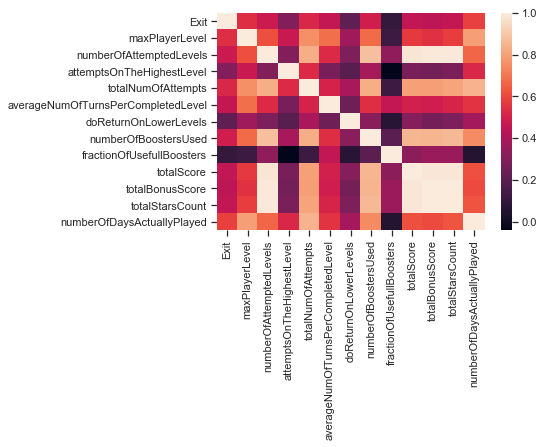

In [101]:
sns.heatmap(Data.corr())

In [76]:
X=X.drop(['totalScore','totalStarsCount','totalBonusScore'], axis='columns')
Data=pd.concat([Y,X],ignore_index=False,axis=1)

In [77]:
Data.describe()

,Exit,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,numberOfDaysActuallyPlayed
count,25289.000000,25289.000000,25289.000000,25289.000000,25289.000000,25289.000000,25289.000000,25289.000000,25289.000000,25289.000000
mean,0.288189,18.424888,12.415991,3.507612,26.841393,13.330451,0.152438,4.901222,0.534841,2.725058
std,0.452928,20.172964,12.991894,6.766648,39.993029,6.657224,0.359452,6.630469,0.402091,2.765350
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.000000,3.000000,1.000000,4.000000,8.400000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,11.000000,8.000000,1.000000,12.000000,14.555556,0.000000,2.000000,0.619048,1.000000
75%,1.000000,27.000000,16.000000,3.000000,31.000000,17.720000,0.000000,6.000000,1.000000,3.000000
max,1.000000,146.000000,142.000000,186.000000,563.000000,40.000000,1.000000,81.000000,1.000000,14.000000


In [78]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25289 entries, 0 to 25288
Data columns (total 10 columns):
Exit                                  25289 non-null int64
maxPlayerLevel                        25289 non-null int64
numberOfAttemptedLevels               25289 non-null int64
attemptsOnTheHighestLevel             25289 non-null int64
totalNumOfAttempts                    25289 non-null int64
averageNumOfTurnsPerCompletedLevel    25289 non-null float64
doReturnOnLowerLevels                 25289 non-null int64
numberOfBoostersUsed                  25289 non-null int64
fractionOfUsefullBoosters             25289 non-null float64
numberOfDaysActuallyPlayed            25289 non-null int64
dtypes: float64(2), int64(8)
memory usage: 1.9 MB


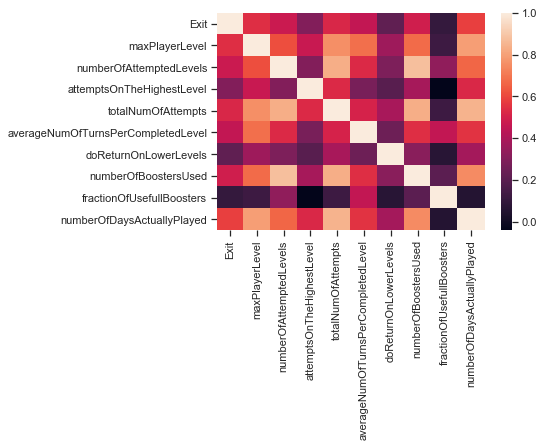

In [79]:
sns.heatmap(Data.corr())

In [80]:
print(Data.corr()['Exit'].abs().sort_values(ascending=False).head(10))

Exit                                  1.000000
numberOfDaysActuallyPlayed            0.580986
maxPlayerLevel                        0.542139
totalNumOfAttempts                    0.520739
numberOfBoostersUsed                  0.493276
numberOfAttemptedLevels               0.477400
averageNumOfTurnsPerCompletedLevel    0.456771
attemptsOnTheHighestLevel             0.302189
doReturnOnLowerLevels                 0.216669
fractionOfUsefullBoosters             0.103720
Name: Exit, dtype: float64


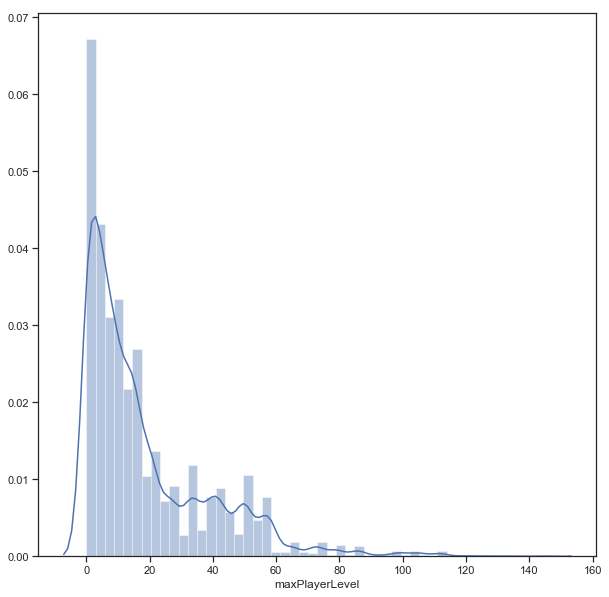

In [81]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(Data['maxPlayerLevel'])

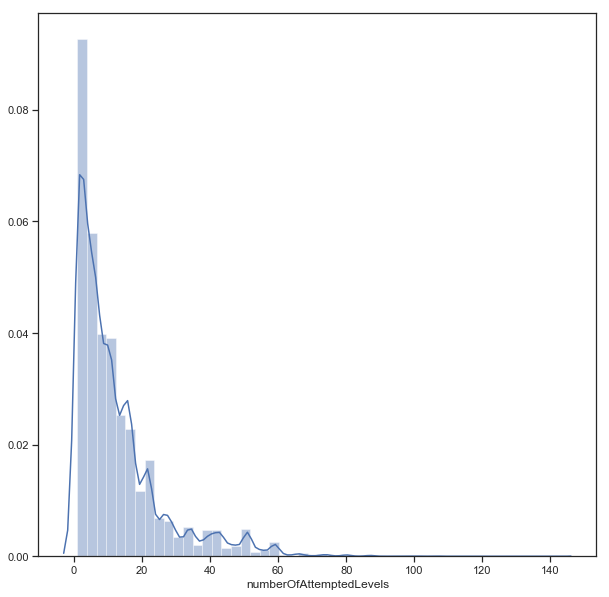

In [82]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(Data['numberOfAttemptedLevels'])

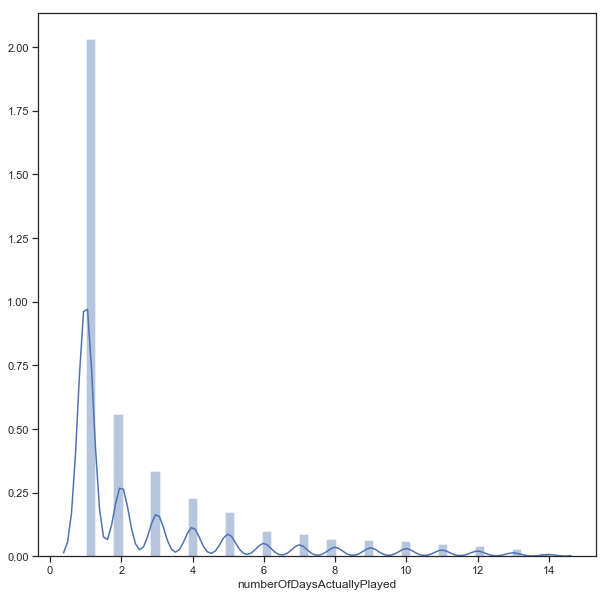

In [84]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(Data['numberOfDaysActuallyPlayed'])

### Что планируется использовать для бинарной классификации:
<br>Случайный лес (random forest).
<br>Градиентный бустинг (gradient boosting).
<br>Логистическая регрессия (logistic regression).
<br>Наивный Байес (naive Bayes).
<br>Метод опорных векторов (support vector machine).
<br>Метод k ближайших соседей (k-nearest neighbors).
<br>
<br>Linear SVC
<br>KNeighbors Classifier
<br>SVC or Ensemble Classifiers
<br>SGD Classifier
<br>kernel approximation

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from sklearn.linear_model import LogisticRegression, SGDClassifier 
from sklearn.svm import SVC, LinearSVC 
from sklearn.naive_bayes import GaussianNB #+ MultinomialNB
from sklearn.kernel_approximation import RBFSampler
#from sklearn.tree import DecisionTreeClassifier

In [96]:
X = pd.DataFrame(preprocessing.scale(X))
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 11)
X.describe()

,0,1,2,3,4,5,6,7,8
count,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04
mean,-5.555637e-16,7.327586e-17,-9.786724e-16,6.555141e-16,2.353116e-17,7.007764e-17,-2.944073e-16,4.342816e-16,2.173410e-15
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00
min,-9.133637e-01,-8.787185e-01,-3.705914e-01,-6.461602e-01,-2.002443e+00,-4.240925e-01,-7.392115e-01,-1.330177e+00,-6.238244e-01
25%,-7.150745e-01,-7.247733e-01,-3.705914e-01,-5.711457e-01,-7.406313e-01,-4.240925e-01,-7.392115e-01,-1.330177e+00,-6.238244e-01
50%,-3.680686e-01,-3.399103e-01,-3.705914e-01,-3.711068e-01,1.840300e-01,-4.240925e-01,-4.375677e-01,2.094257e-01,-6.238244e-01
75%,4.250878e-01,2.758705e-01,-7.501825e-02,1.039853e-01,6.593793e-01,-4.240925e-01,1.657198e-01,1.156873e+00,9.942581e-02
max,6.324189e+00,9.974418e+00,2.696993e+01,1.340657e+01,4.006186e+00,2.357976e+00,1.147736e+01,1.156873e+00,4.077302e+00


## Логистическая регрессия

In [28]:
from sklearn.feature_selection import RFE
lr = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(lr, 4)
rfe = rfe.fit(X_train, y_train)
# summarize the selecion of the attributes
print(rfe.support_)
print(rfe.ranking_)

[ True  True False False  True False False False  True]
[1 1 5 4 1 3 2 6 1]


In [29]:
X_lr_stand=X[[0,1,8]]
Data=pd.concat([Y,X_lr_stand],ignore_index=False,axis=1)

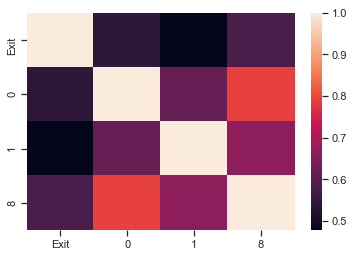

In [158]:
sns.heatmap(Data.corr())

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_lr_stand, Y, test_size = 0.2, random_state = 11)

In [31]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr)
y_train_predict = lr.predict(X_train)
y_test_predict = lr.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, y_test_predict))
print(metrics.confusion_matrix(y_test, y_test_predict))
print(accuracy_score(y_test, y_test_predict), precision_score(y_test, y_test_predict), recall_score(y_test, y_test_predict))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      3625
           1       0.75      0.54      0.63      1433

   micro avg       0.82      0.82      0.82      5058
   macro avg       0.79      0.73      0.75      5058
weighted avg       0.81      0.82      0.81      5058

[[3370  255]
 [ 665  768]]
0.8181099248714907


In [161]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
log_cv=GridSearchCV(lr,grid,cv=10)
log_cv.fit(X_train,y_train)

print("best parameters ",log_cv.best_params_)
print("accuracy :",log_cv.best_score_)

best parameters  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.8227472690425585


In [162]:
log = LogisticRegression(C=0.001,penalty='l2')
log.fit(X_train, y_train)
y_train_predict = log.predict(X_train)
y_test_predict = log.predict(X_test)
print(accuracy_score(y_test, y_test_predict), precision_score(y_test, y_test_predict), recall_score(y_test, y_test_predict))

0.8189007512850929


<module 'matplotlib.pyplot' from 'C:\\Users\\kotsi\\Anaconda37\\lib\\site-packages\\matplotlib\\pyplot.py'>

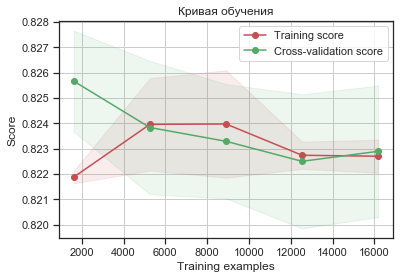

In [91]:
plot_learning_curve(LogisticRegression(C=0.001,penalty='l2'),
                    'LogisticRegression', 
                    X_train, y_train,
                    cv=StratifiedKFold(n_splits=5))

## Наивный Байес

In [32]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print(gnb)
y_train_predict = gnb.predict(X_train)
y_test_predict = gnb.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, y_test_predict))
print(metrics.confusion_matrix(y_test, y_test_predict))
print(accuracy_score(y_test, y_test_predict), precision_score(y_test, y_test_predict), recall_score(y_test, y_test_predict))

GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      3625
           1       0.72      0.58      0.64      1433

   micro avg       0.82      0.82      0.82      5058
   macro avg       0.78      0.74      0.76      5058
weighted avg       0.81      0.82      0.81      5058

[[3293  332]
 [ 600  833]]
0.8157374456306841


<module 'matplotlib.pyplot' from 'C:\\Users\\kotsi\\Anaconda37\\lib\\site-packages\\matplotlib\\pyplot.py'>

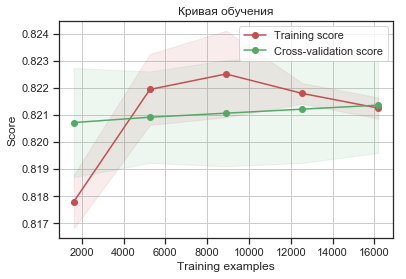

In [90]:
plot_learning_curve(GaussianNB(),
                    'GaussianNB', 
                    X_train, y_train,
                    cv=StratifiedKFold(n_splits=5))

## Метод опорных векторов

In [33]:
svc = SVC()
svc.fit(X_train, y_train)
print(svc)
y_train_predict = svc.predict(X_train)
y_test_predict = svc.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, y_test_predict))
print(metrics.confusion_matrix(y_test, y_test_predict))
print(accuracy_score(y_test, y_test_predict), precision_score(y_test, y_test_predict), recall_score(y_test, y_test_predict))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      3625
           1       0.72      0.63      0.67      1433

   micro avg       0.83      0.83      0.83      5058
   macro avg       0.79      0.77      0.78      5058
weighted avg       0.82      0.83      0.82      5058

[[3276  349]
 [ 535  898]]
0.8252273625939106


<module 'matplotlib.pyplot' from 'C:\\Users\\kotsi\\Anaconda37\\lib\\site-packages\\matplotlib\\pyplot.py'>

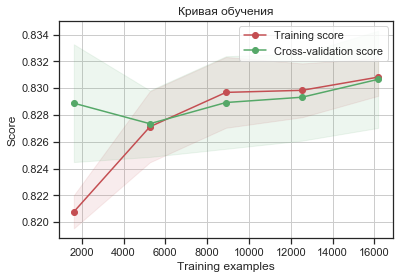

In [92]:
plot_learning_curve(SVC(), 'SVC', 
                    X_train, y_train,
                    cv=StratifiedKFold(n_splits=5))

## Метод k ближайших соседей

In [34]:
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
print(knn)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, y_test_predict))
print(metrics.confusion_matrix(y_test, y_test_predict))
print(accuracy_score(y_test, y_test_predict), precision_score(y_test, y_test_predict), recall_score(y_test, y_test_predict))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      3625
           1       0.68      0.60      0.64      1433

   micro avg       0.81      0.81      0.81      5058
   macro avg       0.76      0.74      0.75      5058
weighted avg       0.80      0.81      0.80      5058

[[3214  411]
 [ 573  860]]
0.8054567022538552


In [44]:
'''grid={"n_neighbors": [230,250,270]}
knn_cv=GridSearchCV(knn,grid,cv=10)
knn_cv.fit(X_train,y_train)

print("best parameters ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)'''

'grid={"n_neighbors": [230,250,270]}\nknn_cv=GridSearchCV(knn,grid,cv=10)\nknn_cv.fit(X_train,y_train)\n\nprint("best parameters ",knn_cv.best_params_)\nprint("accuracy :",knn_cv.best_score_)'

In [46]:
knn=KNeighborsClassifier(metric='euclidean',n_neighbors=250)
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)
print(accuracy_score(y_test, y_test_predict), precision_score(y_test, y_test_predict), recall_score(y_test, y_test_predict))

0.8220640569395018


<module 'matplotlib.pyplot' from 'C:\\Users\\kotsi\\Anaconda37\\lib\\site-packages\\matplotlib\\pyplot.py'>

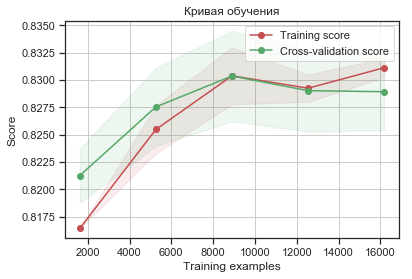

In [88]:
plot_learning_curve(KNeighborsClassifier(metric='euclidean',n_neighbors=250), 'n_neighbors=250', 
                    X_train, y_train,
                    cv=StratifiedKFold(n_splits=5))

## Случайный лес

In [49]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_train_predict = rf.predict(X_train)
y_test_predict = rf.predict(X_test)
print(accuracy_score(y_test, y_test_predict), precision_score(y_test, y_test_predict), recall_score(y_test, y_test_predict))

0.8046658758402531 0.6770087509944311 0.5938590369853455


In [54]:
parameters = { 
    'n_estimators': [200,250, 300,350],
    'max_features': ['log2'],
    'max_depth' : [7],
    'criterion' :['entropy']
}
grid = GridSearchCV(RandomForestClassifier(), parameters, cv=5) 
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [200, 250, 300, 350], 'max_features': ['log2'], 'max_depth': [7], 'criterion': ['entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [55]:
print("best parameters ",grid.best_params_)
print("accuracy :",grid.best_score_)

best parameters  {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 350}
accuracy : 0.8292224803519351


In [57]:
rf = RandomForestClassifier(n_estimators=350, max_depth=7, max_features='log2',criterion='entropy', random_state=11)
rf.fit(X_train, y_train)
y_train_predict = rf.predict(X_train)
y_test_predict = rf.predict(X_test)
print(accuracy_score(y_test, y_test_predict), precision_score(y_test, y_test_predict), recall_score(y_test, y_test_predict))

0.8198892843020957 0.6998468606431854 0.6378227494766224


<module 'matplotlib.pyplot' from 'C:\\Users\\kotsi\\Anaconda37\\lib\\site-packages\\matplotlib\\pyplot.py'>

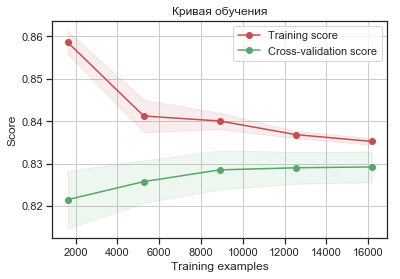

In [89]:
plot_learning_curve(RandomForestClassifier(n_estimators=350, max_depth=7, max_features='log2',criterion='entropy', random_state=11),
                    'n_neighbors=350', 
                    X_train, y_train,
                    cv=StratifiedKFold(n_splits=5))

## Градиентный бустинг

In [59]:
boost=GradientBoostingClassifier()
boost.fit(X_train, y_train)
y_train_predict = boost.predict(X_train)
y_test_predict = boost.predict(X_test)
print(accuracy_score(y_test, y_test_predict), precision_score(y_test, y_test_predict), recall_score(y_test, y_test_predict))

0.8220640569395018 0.7090196078431372 0.630844382414515


In [68]:
parameters = {
    'n_estimators':[25],
    'max_depth':[2],
    'min_samples_split':[550],
 'min_samples_leaf':[75],
    'subsample':[0.4]
}    
grid = GridSearchCV(GradientBoostingClassifier(), parameters) 
grid.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [25], 'max_depth': [2], 'min_samples_split': [550], 'min_samples_leaf': [75, 85, 95], 'subsample': [0.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [69]:
print("best parameters ",grid.best_params_)
print("accuracy :",grid.best_score_)

best parameters  {'max_depth': 2, 'min_samples_leaf': 75, 'min_samples_split': 550, 'n_estimators': 25, 'subsample': 0.4}
accuracy : 0.8299639167614058


In [71]:
boost=GradientBoostingClassifier(n_estimators=25, max_depth=2,min_samples_split=550,
                                          min_samples_leaf=75,subsample=0.4)
boost.fit(X_train, y_train)
y_train_predict = boost.predict(X_train)
y_test_predict = boost.predict(X_test)
print(accuracy_score(y_test, y_test_predict), precision_score(y_test, y_test_predict), recall_score(y_test, y_test_predict))

0.8204824041122973 0.7075098814229249 0.6245638520586183


<module 'matplotlib.pyplot' from 'C:\\Users\\kotsi\\Anaconda37\\lib\\site-packages\\matplotlib\\pyplot.py'>

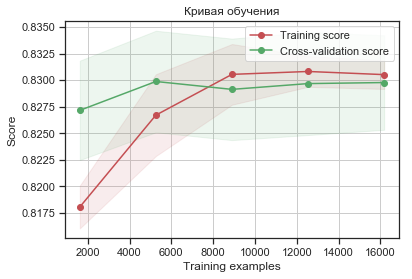

In [93]:
plot_learning_curve(GradientBoostingClassifier(n_estimators=25, max_depth=2,min_samples_split=550,
                                          min_samples_leaf=75,subsample=0.4), 'GradientBoostingClassifier', 
                    X_train, y_train,
                    cv=StratifiedKFold(n_splits=5))

## Наилучшим методом для данной задачи оказался SVM, однако результаты данных методов отличаются лишь в тысячных

In [86]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title("Кривая обучения")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
            estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")

    plt.legend(loc="best")
    return plt